In [1]:
#Loading Data Tool Packages
import pandas as pd
import numpy as np
import json

#Packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Packages for datetime conversions
import time
import datetime as dt
from datetime import datetime

#Packages for Web-scraping
import urllib
import re
from bs4 import BeautifulSoup
import csv
import requests

## Using Finviz (fz), web-scraping performed to grab majority of biotechnology and healthcare sector stocks tickers.

In [3]:
start = time.time()

fzBiotechURL = "https://finviz.com/screener.ashx?v=111&f=ind_biotechnology"
fzConnection = urllib.request.urlopen(fzBiotechURL)
fzOutput = fzConnection.read()
fzParser = BeautifulSoup(fzOutput, 'html.parser')
listOfTickers = []
listOfPages = []

#Grab all links to pages
for page in fzParser.findAll('a', attrs={'class': 'screener-pages'}):
    listOfPages.append(page.text)

lastPage = listOfPages[-1:]
linksOfPageNumbers = []
linksOfPages = []

for num in range(int(lastPage[0])):
    num = (num * 20)+1 
    linksOfPageNumbers.append(num)

for num in linksOfPageNumbers:
    newLinks = "https://finviz.com/screener.ashx?v=111&f=ind_biotechnology&r="+str(num)
    linksOfPages.append(newLinks)


def grabAllBiotechURLs(array):
    listOfTickers = []
    listOfPages = []

    for url in array:
        fzConnection = urllib.request.urlopen(url)
        fzOutput = fzConnection.read()
        fzParser = BeautifulSoup(fzOutput, 'html.parser')
        
        #Grab all the Tickers
        for tr in fzParser.findAll('td', attrs={'class': 'screener-body-table-nw'}):
            for line in tr.findAll('a', attrs={'class': 'screener-link-primary'}):
                listOfTickers.append(line.text)
                break
    return listOfTickers

finalURL = grabAllBiotechURLs(linksOfPages[1:])
#np.savetxt("foo.csv", linksOfPages)

#export_csv = df.to_csv (r'C:\Users\chappie\Desktop\export_dataframe.xlsx', index = None, header=True) 
fzConnection.close()

end = time.time()
print("Program Total RunTime: ", end - start)

Program Total RunTime:  86.16185808181763


## Using Alpha Vantage, dataframe will be created to look at historical data from 2000 - 2020.
Reference documentation: https://www.alphavantage.co/documentation/

Possible Use with these built-in functions: VWAP, EMA, RSI, ADX, MACD

In [4]:
api_dir = r"C:\Users\chappie\Documents\GitHub\Predicting_Biotech_Stock_Performance\API_KEY.txt"
api_key = open(api_dir,"r").read()

#Writing function queries into array from documentation
alphaVFunctions = ['TIME_SERIES_INTRADAY','TIME_SERIES_DAILY','TIME_SERIES_DAILY_ADJUSTED','TIME_SERIES_WEEKLY','TIME_SERIES_MONTHLY', 'TIME_SERIES_WEEKLY_ADJUSTED','TIME_SERIES_MONTHLY_ADJUSTED']

#Writing Interval queries into array from documentation
alphaVIntervals = ['1min', '5min', '15min', '30min', '60min']

#Using List from Finviz
print(finalURL)

#Using Temporary Placeholder Ticker
ticker = 'MSFT'

#Using outputsize parameters: full (full-length) rather than compact (>=100 data pts)
def useAPI(function, ticker, interval, output):
    AV_URL = 'https://www.alphavantage.co/query?function='+ alphaVFunctions[1] +'&symbol='+ ticker + '&interval='+ alphaVIntervals[1] + '&outputsize=full' + '&apikey=' + api_key
    return AV_URL

['AGEN', 'AGIO', 'AGLE', 'AGTC', 'AIKI', 'AIM', 'AIMT', 'AKBA', 'AKCA', 'AKRO', 'AKTX', 'ALBO', 'ALDX', 'ALEC', 'ALKS', 'ALLK', 'ALLO', 'ALNA', 'ALNY', 'ALPN', 'ALRN', 'ALT', 'ALXN', 'AMAG', 'AMGN', 'AMPE', 'AMRN', 'ANAB', 'ANCN', 'ANIK', 'ANIP', 'ANPC', 'ANVS', 'APLS', 'APLT', 'APM', 'APOP', 'APRE', 'APTO', 'APTX', 'APVO', 'AQB', 'AQST', 'ARAV', 'ARCT', 'ARDS', 'ARDX', 'ARGX', 'ARMP', 'ARNA', 'ARPO', 'ARQT', 'ARTL', 'ARVN', 'ARWR', 'ASLN', 'ASMB', 'ASND', 'ATHE', 'ATHX', 'ATNM', 'ATNX', 'ATOS', 'ATRA', 'ATXI', 'AUPH', 'AUTL', 'AVDL', 'AVEO', 'AVRO', 'AVXL', 'AXGT', 'AXLA', 'AXSM', 'AYTU', 'AZRX', 'BBI', 'BBIO', 'BCDA', 'BCEL', 'BCLI', 'BCRX', 'BCYC', 'BDSI', 'BDTX', 'BEAM', 'BFRA', 'BGNE', 'BHVN', 'BIIB', 'BLCM', 'BLPH', 'BLRX', 'BLU', 'BLUE', 'BMRN', 'BNTC', 'BNTX', 'BPMC', 'BPMX', 'BPTH', 'BSTC', 'BTAI', 'BVXV', 'BXRX', 'BYSI', 'CABA', 'CALA', 'CANF', 'CAPR', 'CARA', 'CASI', 'CATB', 'CBAY', 'CBIO', 'CBLI', 'CBMG', 'CBPO', 'CCXI', 'CDMO', 'CDMOP', 'CDTX', 'CDXC', 'CDXS', 'CERC', 'CER

In [11]:
data = requests.get(useAPI(alphaVFunctions[1],ticker,alphaVIntervals[2], ''))
data = data.json()

if data:
    print('Request is successful.')
else:
    print('Request returned an error.')
    
#Printing the Parameters to make proper request.
header = data['Meta Data']
print(header)

Request is successful.
{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2020-04-21', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}


In [97]:
#Testing Parameters
""""start = dt.datetime(2000,1,1)
refreshed = '3. Last Refreshed'
#params = dict(refreshed = start)
testResponse = requests.get(useAPI(alphaVFunctions[4],ticker,alphaVIntervals[1],'')).json()
#print(testResponse)
#Printing the Parameters to make proper request.
metadata = data['Meta Data']
timeseries = data['Time Series (5min)']
for i in timeseries.items():
    print(i)"""

'"start = dt.datetime(2000,1,1)\nrefreshed = \'3. Last Refreshed\'\n#params = dict(refreshed = start)\ntestResponse = requests.get(useAPI(alphaVFunctions[4],ticker,alphaVIntervals[1],\'\')).json()\n#print(testResponse)\n#Printing the Parameters to make proper request.\nmetadata = data[\'Meta Data\']\ntimeseries = data[\'Time Series (5min)\']\nfor i in timeseries.items():\n    print(i)'

In [7]:
#Exploring API
start = dt.datetime(2000,1,1)
end = dt.datetime(2020,4,1)
params = dict(
    start_date = start,
    end_date = end
)

In [6]:
#Define Arrays
timeIntervals = []
dfValues = []

#Define Columns in list form.
openingValue = []
highValue = []
lowValue = []
closeValue = []
volumeValue = []

In [15]:
start = time.time()

for url in finalURL:
    response = requests.get(useAPI(alphaVFunctions[2],url,alphaVIntervals[1], ''), params).json()
    #print(response)
    datadump = json.dumps(response, indent=2, sort_keys=True)
    #print(datadump)
    
    #if response:
    #    print('Response was grabbed for ' + url + '!')

    #timeSeries = 'Time Series (5min)'
    timeSeries = 'Time Series (Daily)'
    #metaStr = 'Meta Data'
    #metaData = data[metaStr]
    
    #Create DataFrame to grab.
    df = pd.DataFrame([data])
    dataTimeSeries = df[timeSeries]
    #Grab Values from Time Series.
    for j, k in dataTimeSeries.items():
        #Separate Time interval (l) into one list, and values (m) into dfValues.
        for l, m in k.items():
            timeIntervals.append(l)
            dfValues.append(m)
            #Loop through dfValues to turn extra values from dictionary.
            #n value example: 1. open, 2. high...
            #o value for n: 140.2300, 143.8400...
            loopCount = 0
            for n, o in m.items():
                if (n == '1. open'):
                    openingValue.append(o)
                if (n == '2. high'):
                    highValue.append(o)
                if (n == '3. low'):
                    lowValue.append(o)
                if (n == '4. close'):
                    closeValue.append(o)
                if (n == '5. volume'):
                    volumeValue.append(o)
    """
    #Checking the lengths if it is equal.
    if len(timeIntervals) == len(dfValues):
        print("Time Interval and Values are the Same Length. Ok to continue program!")
    """
    #Create our data set
    allData = pd.DataFrame()
    allData['DateTime'] = timeIntervals
    allData['DateTime'] = pd.to_datetime(allData['DateTime'], errors='coerce')
    allData['Time'] = allData['DateTime'].dt.time
    #allData['Time'] = pd.to_timedelta(allData['Time'], errors='coerce')
    #print(allData['Time'])
    allData['Open'] = openingValue
    allData['Open'] = allData['Open'].astype(float)
    allData['Low'] = lowValue
    allData['Low'] = allData['Low'].astype(float)
    allData['Close'] = closeValue
    allData['Close'] = allData['Close'].astype(float)
    allData['Volume'] = volumeValue
    allData['Volume'] = allData['Volume'].astype(float)
    #print(allData.dtypes)
    allData.to_csv(url + ".csv", encoding='utf-8', index=False)

    
end = time.time()
print("Program Total RunTime: ", end - start)

KeyboardInterrupt: 

In [2]:
AMGEN = r'C:\Users\chappie\Documents\GitHub\Predicting_Biotech_Stock_Performance\Predicting-Biotech-Stock-Performance\AMGN.csv'
pdAMGEN = pd.read_csv(AMGEN)
pdAMGIndex = pd.read_csv(AMGEN, index_col=0, parse_dates=True)

uniqueDateTime = pdAMGEN.DateTime.unique()
print("Unique Rows based on DateTime:", len(uniqueDateTime))
print("Current Rows from Table:", len(pdAMGEN))

pdAMGEN = pdAMGEN.iloc[:5031]
print(len(pdAMGEN))
pdAMGEN.head()

pdAMGIndex = pdAMGIndex.iloc[:5031]
uniqueDateTimeIndex = pdAMGEN.DateTime.unique()
print("Unique Rows based on DateTimeIndex:", len(uniqueDateTimeIndex))
print("Current Rows from Table_Index:", len(pdAMGIndex))
print(pdAMGIndex)

Unique Rows based on DateTime: 5031
Current Rows from Table: 125775
5031
Unique Rows based on DateTimeIndex: 5031
Current Rows from Table_Index: 5031
                Time    Open       Low   Close       Volume
DateTime                                                   
2020-04-21  00:00:00  173.50  166.1102  167.82   55826672.0
2020-04-20  00:00:00  176.63  174.9900  175.06   36669595.0
2020-04-17  00:00:00  179.50  175.8700  178.60   52765625.0
2020-04-16  00:00:00  174.30  172.9000  177.04   50479610.0
2020-04-15  00:00:00  171.20  169.2400  171.88   40940833.0
...              ...     ...       ...     ...          ...
2000-04-27  00:00:00   67.44   67.3700   69.81   38834900.0
2000-04-26  00:00:00   70.00   67.3700   68.00   53545600.0
2000-04-25  00:00:00   68.75   67.6200   69.37   79758700.0
2000-04-24  00:00:00   67.25   65.0000   66.62  156822900.0
2000-04-20  00:00:00   78.62   77.5000   78.94   26193700.0

[5031 rows x 5 columns]


In [3]:
#Add Separate Columns for Day, Month, Year, Month Names, and Season to dataframe
def dateTimeConversion(df):
    #Arrays for Appending
    yearArr = []
    monthArr = []
    monthNamesArr = []
    dayArr = []
    seasonArr = []
    #Months & Seasons (Spring: March-May/03-05, Summer: June-August/06-08, Fall/Autumn: )
    monthNames = ['','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    #Fall/Autumn: September, October, November [09-11]
    #Winter: December, January, February [12-02]
    seasonNames = ['','Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer','Summer','Summer','Fall','Fall','Fall','Winter']
    for x in df.DateTime:
        datetimestrp = datetime.strptime(x, '%Y-%m-%d')
        yearArr.append(datetimestrp.year)
        monthArr.append(datetimestrp.month)
        dayArr.append(datetimestrp.day)
       # print(monthNames[int(datetimestrp.month)])
        monthNamesArr.append(monthNames[int(datetimestrp.month)])
        seasonArr.append(seasonNames[int(datetimestrp.month)])
    df['Month'] = monthArr
    df['Day'] = dayArr
    df['Year'] = yearArr
    df['MonthName'] = monthNamesArr
    df['Season'] = seasonArr
    
    return df


newpd = dateTimeConversion(pdAMGEN)
newpd = newpd.sort_values(by=['DateTime'],ascending=True)
newpd.index = range(1,len(newpd) + 1)
newpd['Open_to_Close'] = newpd.Open - newpd.Close

#newpdTwo = dateTimeConversion(pdAMGIndex)
newpdTwo = pdAMGIndex.sort_index(ascending=True)
#newpdTwo.index = range(1,len(newpdTwo) + 1)
newpdTwo['Open_to_Close'] = newpdTwo.Open - newpdTwo.Close
print(newpdTwo)

                Time    Open       Low   Close       Volume  Open_to_Close
DateTime                                                                  
2000-04-20  00:00:00   78.62   77.5000   78.94   26193700.0          -0.32
2000-04-24  00:00:00   67.25   65.0000   66.62  156822900.0           0.63
2000-04-25  00:00:00   68.75   67.6200   69.37   79758700.0          -0.62
2000-04-26  00:00:00   70.00   67.3700   68.00   53545600.0           2.00
2000-04-27  00:00:00   67.44   67.3700   69.81   38834900.0          -2.37
...              ...     ...       ...     ...          ...            ...
2020-04-15  00:00:00  171.20  169.2400  171.88   40940833.0          -0.68
2020-04-16  00:00:00  174.30  172.9000  177.04   50479610.0          -2.74
2020-04-17  00:00:00  179.50  175.8700  178.60   52765625.0           0.90
2020-04-20  00:00:00  176.63  174.9900  175.06   36669595.0           1.57
2020-04-21  00:00:00  173.50  166.1102  167.82   55826672.0           5.68

[5031 rows x 6 columns]


In [4]:
sns.set(rc={'figure.figsize':(11, 4)})
newpdTwo.Open.plot(linewidth=0.5)
plt.show(

ax = newpdTwo.loc['2019','Open'].plot()
ax.set_ylabel('Month')
plt.show()

#Why is matplotlib slower than sns?

SyntaxError: invalid syntax (<ipython-input-4-dc00bb4c7995>, line 6)

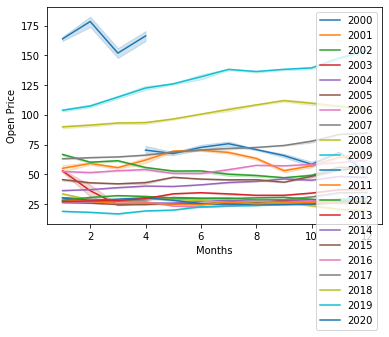

<Figure size 1440x1440 with 0 Axes>

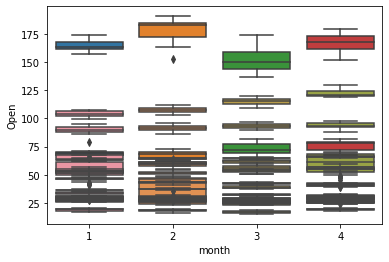

<Figure size 1440x1440 with 0 Axes>

Running Complete


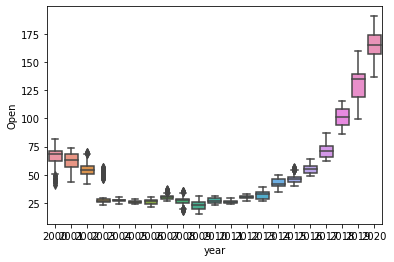

In [5]:
#Design a function for any data table to graph all yearly data on one graph with the x-axis as Month and y-axis as price.
def graphMultipleYears(df,column):
    
    #Grabbing the unique values (history) for years, months, and day
    df['year'] = [d.year for d in df.index]
    years = pd.unique(df.year)
    #years = df.year.unique()
    df['month'] = [d.month for d in df.index]
    months = pd.unique(df.month)
    df['day'] = [d.day for d in df.index]
    
    #Mapping the Month and Day together for future use when setting the index
    #df['month_day'] = df['month'].map(str) +'-'+ df['day'].map(str)
    #df['month_day'] = df['month'] +'-'+ df['day']
    #Establish arrays
    monthNamesArr = []
    seasonArr = []
    
    for m in df.month:
        #Months & Seasons (Spring: March-May/03-05, Summer: June-August/06-08, Fall/Autumn: )
        monthNames = ['','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        #Fall/Autumn: September, October, November [09-11]
        #Winter: December, January, February [12-02]
        seasonNames = ['','Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer','Summer','Summer','Fall','Fall','Fall','Winter']
        monthNamesArr.append(monthNames[int(m)])
        seasonArr.append(seasonNames[int(m)])
        
    #Assign New Columns
    df['MonthName'] = monthNamesArr
    df['Season'] = seasonArr
    #Loop through each year
    for year in years:
        #Gather the filtered dataframe by year
        eachYear = df.loc[str(year)]
        
        #Set Index with month and day combined by dash ("-")
        #month = eachYear.set_index('month_day')
        
        
        #print(eachYear)
        
        #Matplotlib
        ax = sns.lineplot(x='month',y='Open',data=eachYear,label=year)
    
    ax.set(xlabel='Months',ylabel='Open Price')
    plt.figure(figsize=(20,20))
    plt.show()
    
    
    for year in years:
        #Gather the filtered dataframe by year
        eachYear = df.loc[str(year)]

        #Set Index with month and day combined by dash ("-")
        #month = eachYear.set_index('month_day')


        #print(eachYear)

        #Matplotlib
        sns.boxplot(x='month',y='Open',data=eachYear)
        
    plt.figure(figsize=(20,20))
    plt.show()
    
    sns.boxplot(x='year',y='Open',data=df)
#plt.yticks([0, 2, 4, 6, 8, 10])
graphMultipleYears(newpdTwo, 'Open')
print("Running Complete")


#grab the month if = (January for hte 1st month)

1    78.62
2    67.25
3    68.75
4    70.00
5    67.44
Name: Open, dtype: float64


ValueError: could not convert string to float: 'Spring'

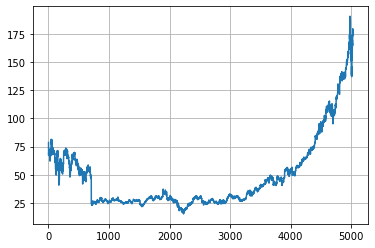

In [6]:
import matplotlib.dates as mdates
import statsmodels.api as sm

#newpd['DateTime'] = pd.to_datetime(newpd['DateTime'])

#newpd = newpd.set_index('DateTime')
print(newpd['Open'].head())
newpd['Open'].plot(grid=True)


newpd = newpd.drop(['Time'], axis=1)
decomposition = sm.tsa.seasonal_decompose(newpd, model='additive')

print(decomposition)
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [9.0, 5.0]

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)

year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(newpdTwo.index, newpdTwo['Open'], c='blue')
#plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [3]:
"""
linearModel1 = sm.OLS(YVAR, XVAR).fit()
print(linearModel1.summary())
XVar2=sm.add_constant(XVar)
linearModel2 = sm.OLS(YVAR,XVar2).fit()
print(linearModel2.summary())

"""

In [4]:
import sys
!{sys.executable} -m pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=cb0bee73d4b3fc242560d1efb27824abc737dae0e818528888f8de9ba9a5e655
  Stored in directory: c:\users\chappie\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
#Plot Data for Fun!
plt.scatter(allData.DateTime,allData.Open)
plt.show()

0     3242733.0
1     2009502.0
2     1059334.0
3     1200330.0
4      934889.0
        ...    
95     500882.0
96     522875.0
97     455427.0
98     537203.0
99     482648.0
Name: Volume, Length: 100, dtype: float64


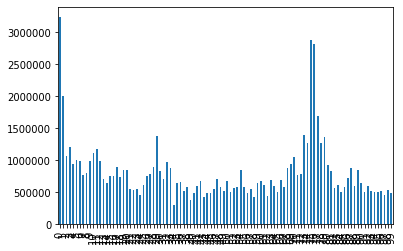

In [11]:
print(allData['Volume'])
allData['Volume'].plot.bar()

In [17]:
#print(data)
df = pd.DataFrame([data])
timeSeries = 'Time Series (5min)'
dfTimeSeries = df[timeSeries]
#print(type(dfTimeSeries))